# Tratamento de dados

### 1 - Inicio minha análise fazendo uma amostragem da base de dados, para entender os dados com que irei trabalhar.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel('base-loggi.xlsx')
display(df.head(3))

,Cidade de Destino do Pacote,Regional,Produto,Local de Coleta,Prazo de Entrega,Data de Entrega,Base de Entrega,Transportadora,Entregadores,Categoria dos Ofensores,Subcategoria dos Ofensores,# Pacotes,# Ofensores,Status da Entrega
0,Belo Horizonte,Regional 5,ENTREGA PADRÃO,GALPÃO 9,2020-09-01,2020-08-31,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,CARRO,NaN,NaN,213,0,Antecipado
1,Belo Horizonte,Regional 5,ENTREGA PADRÃO,GALPÃO 9,2020-09-01,2020-09-01,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,CARRO,NaN,NaN,2841,0,Cumpriu o prazo
2,Apucarana,Regional 2,ENTREGA PADRÃO,GALPÃO 8,2020-09-16,2020-09-16,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,MOTO,NaN,NaN,151,0,Cumpriu o prazo


### 2 - Em seguida, crio uma tabela com os valores únicos das colunas não numéricas para identificar possíveis valores em branco ou erros de digitação.



*   Nessa etapa, foi possível observar que a cidade de São Paulo foi digitada de duas formas diferentes ('São Paulo' e 'SÃO PAULO') o que afetou também os valores da coluna 'Regional'.

*   Também foram identificados datas em formatos diferentes nas colunas 'Prazo de Entrega' e 'Data de Entrega'.







In [51]:
colunas_ignorar = ['# Pacotes', '# Ofensores']
for coluna in df.columns:
    if coluna not in colunas_ignorar:
        print(f'valores únicos de {coluna}:')
        print(df[coluna].unique())
        print('\n')

valores únicos de Cidade de Destino do Pacote:
['Belo Horizonte' 'Apucarana' 'Campinas' 'Curitiba' 'Distrito Federal'
 'Florianópolis' 'Fortaleza' 'Goiânia' 'Joinville' 'Manaus' 'SÃO PAULO'
 'Porto Alegre' 'Recife' 'Ribeirão Preto' 'Rio de Janeiro' 'Salvador'
 'Santos' 'São José dos Campos' 'São Paulo' 'Sorocaba' 'Vitória'
 'Blumenau' 'Campos dos Goytacazes' 'Caxias do Sul' 'Criciúma'
 'Divinópolis' 'Feira de Santana' 'Foz do Iguaçu' 'Governador Valadares'
 'Juiz de Fora' 'Londrina' 'Maceió' 'Maringá' 'Pato Branco' 'Petrópolis'
 'Presidente Prudente' 'São Carlos' 'São José do Rio Preto'
 'Taubaté - Pindamonhangaba' 'Teresina' 'Toledo' 'Ubá']


valores únicos de Regional:
['Regional 5' 'Regional 2' 'Regional 4' 'Regional 3' 'Regional 6' nan
 'Regional 1']


valores únicos de Produto:
['ENTREGA PADRÃO' 'ENTREGA RÁPIDA']


valores únicos de Local de Coleta:
['GALPÃO 9' 'GALPÃO 8' 'GALPÃO 6' 'GALPÃO 7' 'GALPÃO 10' 'GALPÃO 2'
 'GALPÃO 1' 'GALPÃO 5' 'GALPÃO 4' 'GALPÃO 3']


valores únicos de

### 3 - Crio uma nova base de dados corrigindo os erros de digitação da cidade de São Paulo, padronizando os formatos de data e substituindo os valores nulos da coluna 'Regional' pelo valor 'Regional 1', correspondente à cidade de São Paulo.

In [55]:

df_corrigido = df.copy()
df_corrigido['Cidade de Destino do Pacote'] = df_corrigido['Cidade de Destino do Pacote'].replace('SÃO PAULO', 'São Paulo')
df_corrigido['Prazo de Entrega'] = pd.to_datetime(df_corrigido['Prazo de Entrega'], errors='coerce')
df_corrigido['Data de Entrega'] = pd.to_datetime(df_corrigido['Data de Entrega'], errors='coerce')
df_corrigido['Regional'] = df_corrigido['Regional'].fillna('Regional 1')
display(df_corrigido.head())


,Cidade de Destino do Pacote,Regional,Produto,Local de Coleta,Prazo de Entrega,Data de Entrega,Base de Entrega,Transportadora,Entregadores,Categoria dos Ofensores,Subcategoria dos Ofensores,# Pacotes,# Ofensores,Status da Entrega
0,Belo Horizonte,Regional 5,ENTREGA PADRÃO,GALPÃO 9,2020-09-01,2020-08-31,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,CARRO,NaN,NaN,213,0,Antecipado
1,Belo Horizonte,Regional 5,ENTREGA PADRÃO,GALPÃO 9,2020-09-01,2020-09-01,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,CARRO,NaN,NaN,2841,0,Cumpriu o prazo
2,Apucarana,Regional 2,ENTREGA PADRÃO,GALPÃO 8,2020-09-16,2020-09-16,OPERAÇÃO TERCEIRIZADA,Transportadora - 5,MOTO,NaN,NaN,151,0,Cumpriu o prazo
3,Apucarana,Regional 2,ENTREGA PADRÃO,GALPÃO 6,2020-09-04,2020-09-03,OPERAÇÃO FRANQUEADOS,Transportadora - 4,CARRO,NaN,NaN,113,0,Antecipado
4,Apucarana,Regional 2,ENTREGA PADRÃO,GALPÃO 9,2020-09-02,2020-09-01,OPERAÇÃO TERCEIRIZADA,Transportadora - 4,CARRO,NaN,NaN,166,0,Antecipado


# Indicadores de Qualidade

### 1 - Percentual de Entregas no Prazo e Taxa de Atraso.



*   Total de entregas: 1900
* Percentual entregas no prazo: 94.58%
* Percentual entregas atrasadas: 5.42%




In [72]:
df_corrigido['Prazo de Entrega'] = pd.to_datetime(df_corrigido['Prazo de Entrega'], errors='coerce')
df_corrigido['Data de Entrega'] = pd.to_datetime(df_corrigido['Data de Entrega'], errors='coerce')

df_corrigido['dias_em_atraso'] = (df_corrigido['Data de Entrega'] - df_corrigido['Prazo de Entrega']).dt.days
df_corrigido['entrega_atrasada'] = df_corrigido['dias_em_atraso'] > 0

total_entregas = df_corrigido.shape[0]
entregas_no_prazo = (~df_corrigido['entrega_atrasada']).sum()
entregas_atrasadas = df_corrigido['entrega_atrasada'].sum()

percentual_no_prazo = round(100 * entregas_no_prazo / total_entregas, 2)
percentual_atraso = round(100 * entregas_atrasadas / total_entregas, 2)

print(f"Total de entregas: {total_entregas}")
print(f"Percentual entregas no prazo: {percentual_no_prazo}%")
print(f"Percentual entregas atrasadas: {percentual_atraso}%")


Total de entregas: 1900
Percentual entregas no prazo: 94.58%
Percentual entregas atrasadas: 5.42%


### 2 - Dias Médios de Atraso (considerando apenas entregas atrasadas).



*   Foi identificado que a média de tempo de atraso é de 1,49 dia.



In [73]:
dias_medio_atraso = df_corrigido.loc[df_corrigido['entrega_atrasada'], 'dias_em_atraso'].mean()
print(f"Dias médios de atraso (entre entregas atrasadas): {dias_medio_atraso:.2f} dias")

Dias médios de atraso (entre entregas atrasadas): 1.49 dias


### 3 - Percentual de Pacotes com Problemas (Ofensores).



*   Total de pacotes: 1501211
*  Total de ofensores : 46948
*  Percentual de pacotes com problemas: 3.13%




In [74]:
total_pacotes = df_corrigido['# Pacotes'].sum()
total_ofensores = df_corrigido['# Ofensores'].sum()
percentual_ofensores = round(100 * total_ofensores / total_pacotes, 2)

print(f"Total de pacotes: {total_pacotes}")
print(f"Total de ofensores: {total_ofensores}")
print(f"Percentual de pacotes com problemas: {percentual_ofensores}%")

Total de pacotes: 1501211
Total de ofensores (problemas): 46948
Percentual de pacotes com problemas: 3.13%


### 4 - Top categorias de ofensores.



*   Foi observado que a categoria mais frequente de ofensor é "Destinatário Ausente".




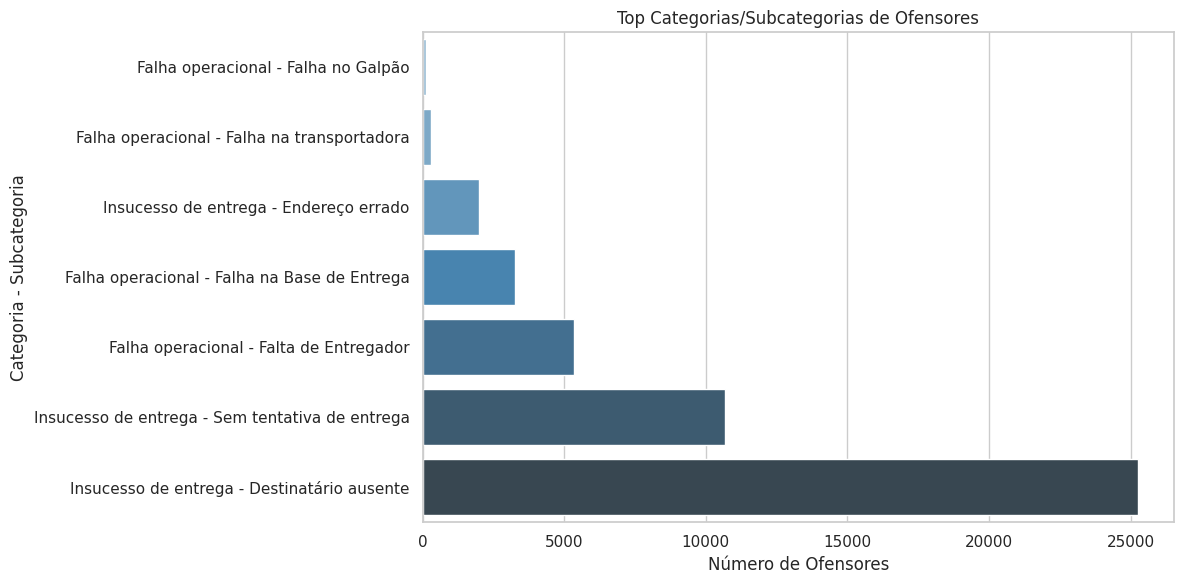

In [81]:
top_ofensores = (
    df_corrigido.dropna(subset=['Categoria dos Ofensores', 'Subcategoria dos Ofensores'])
    .groupby(['Categoria dos Ofensores', 'Subcategoria dos Ofensores'])['# Ofensores']
    .sum()
    .reset_index()
    .sort_values('# Ofensores', ascending=False)

)

top_ofensores['Ofensor'] = top_ofensores['Categoria dos Ofensores'] + ' - ' + top_ofensores['Subcategoria dos Ofensores']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_ofensores.sort_values('# Ofensores'),
    x='# Ofensores',
    y='Ofensor',
    palette='Blues_d'
)
plt.title('Top Categorias/Subcategorias de Ofensores')
plt.xlabel('Número de Ofensores')
plt.ylabel('Categoria - Subcategoria')
plt.tight_layout()
plt.show()

### Transportadoras com maior percentual de problemas com os pacotes.



*   Observamos que as transportadoras 3 e 5 possuem o maior percentual de problemas com a entrega dos pacotes.



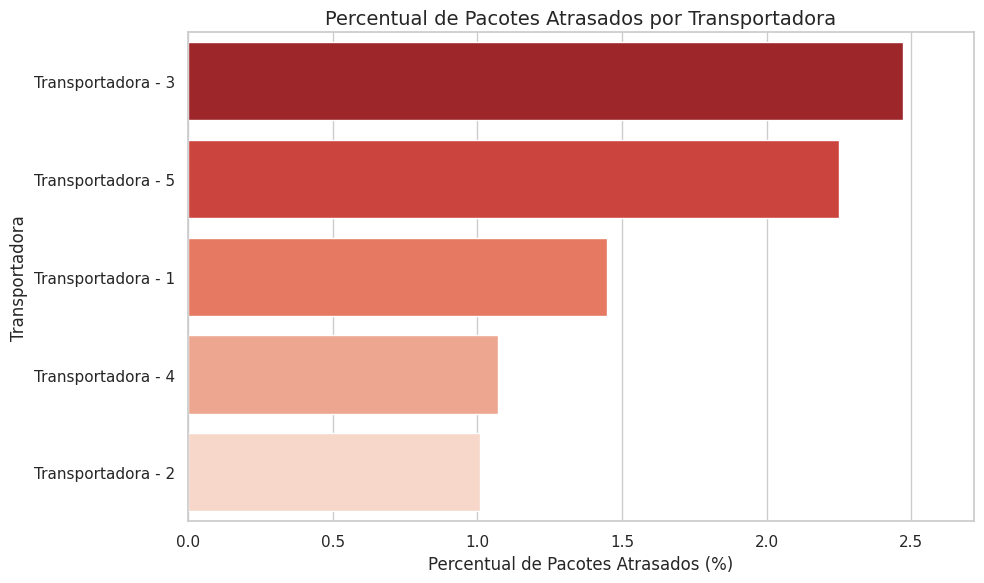

In [79]:
group = df_corrigido.groupby('Transportadora').apply(
    lambda g: pd.Series({
        'pacotes_totais': g['# Pacotes'].sum(),
        'pacotes_atrasados': g.loc[g['entrega_atrasada'], '# Pacotes'].sum()
    })
).reset_index()

group['percentual_atraso'] = round(100 * group['pacotes_atrasados'] / group['pacotes_totais'], 2)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=group.sort_values('percentual_atraso', ascending=False),
    x='percentual_atraso',
    y='Transportadora',
    palette='Reds_r'
)

plt.title('Percentual de Pacotes Atrasados por Transportadora', fontsize=14)
plt.xlabel('Percentual de Pacotes Atrasados (%)')
plt.ylabel('Transportadora')
plt.xlim(0, group['percentual_atraso'].max() * 1.1)

plt.tight_layout()
plt.show()

### Top 10 Cidades com Maior % de Pacotes com Problemas.

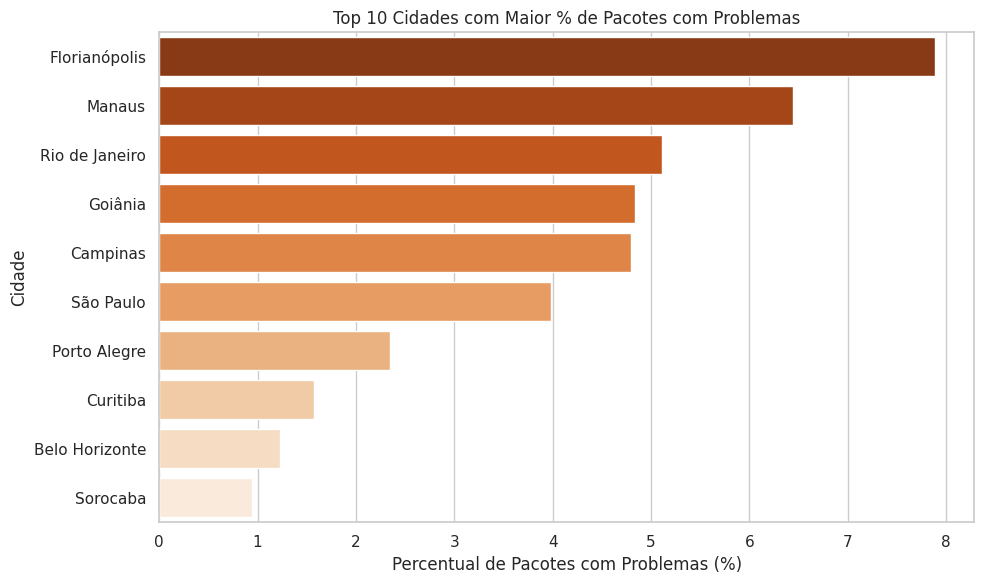

In [84]:
agrupado_cidade = df_corrigido.groupby('Cidade de Destino do Pacote').agg(
    total_pacotes=('# Pacotes', 'sum'),
    total_ofensores=('# Ofensores', 'sum')
)

agrupado_cidade['percentual_ofensores'] = round(100 * agrupado_cidade['total_ofensores'] / agrupado_cidade['total_pacotes'], 2)
top_cidades_problemas = agrupado_cidade.sort_values('percentual_ofensores', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_cidades_problemas.reset_index(),
    y='Cidade de Destino do Pacote',
    x='percentual_ofensores',
    palette='Oranges_r'
)
plt.title('Top 10 Cidades com Maior % de Pacotes com Problemas')
plt.xlabel('Percentual de Pacotes com Problemas (%)')
plt.ylabel('Cidade')
plt.tight_layout()
plt.show()

# Ranking de Performance

### O Ranking de cidades foi baseado no score de performance de cada cidade.
O Performance Score é uma métrica composta por três fatores:

*  Entregas bem-sucedidas (50% do peso),

*  Menor proporção de falhas operacionais atribuídas à transportadora (30%),

*  Volume de pacotes movimentados (20%).

O cálculo combina essas variáveis normalizadas, gerando uma pontuação de 0 a 1, onde valores mais altos indicam melhor performance operacional.

In [93]:
agrupado = df_corrigido.groupby('Cidade de Destino do Pacote').agg(
    total_pacotes=('# Pacotes', 'sum'),
    total_ofensores=('# Ofensores', 'sum')
).reset_index()
falhas_op = df_corrigido[df_corrigido['Categoria dos Ofensores'] == 'Falha operacional']
falhas_op_cidade = falhas_op.groupby('Cidade de Destino do Pacote')['# Ofensores'].sum().reset_index()
falhas_op_cidade.rename(columns={'# Ofensores': 'falhas_operacionais'}, inplace=True)
agrupado = agrupado.merge(falhas_op_cidade, on='Cidade de Destino do Pacote', how='left')
agrupado['falhas_operacionais'] = agrupado['falhas_operacionais'].fillna(0)
agrupado['%_entregas_bem_sucedidas'] = round(100 * (agrupado['total_pacotes'] - agrupado['total_ofensores']) / agrupado['total_pacotes'], 2)
agrupado['%_falhas_operacionais'] = round(100 * agrupado['falhas_operacionais'] / agrupado['total_pacotes'], 2)
agrupado['score_entregas'] = agrupado['%_entregas_bem_sucedidas'] / 100
agrupado['score_falhas'] = 1 - (agrupado['%_falhas_operacionais'] / 100)
agrupado['score_volume'] = agrupado['total_pacotes'] / agrupado['total_pacotes'].max()
agrupado['performance_score'] = round(
    0.5 * agrupado['score_entregas'] +
    0.3 * agrupado['score_falhas'] +
    0.2 * agrupado['score_volume'],
    4
)

ranking_final = agrupado.sort_values('performance_score', ascending=False).reset_index(drop=True)
ranking_final[['Cidade de Destino do Pacote', '%_entregas_bem_sucedidas', '%_falhas_operacionais', 'total_pacotes', 'performance_score']]


,Cidade de Destino do Pacote,%_entregas_bem_sucedidas,%_falhas_operacionais,total_pacotes,performance_score
0,São Paulo,96.02,0.17,732177,0.9796
1,Distrito Federal,99.74,0.00,56093,0.8140
2,Santos,100.00,0.00,35926,0.8098
3,Rio de Janeiro,94.89,1.47,144198,0.8094
4,Belo Horizonte,98.77,0.26,58429,0.8090
5,Recife,100.00,0.00,27602,0.8075
6,Fortaleza,99.63,0.00,27923,0.8058
7,Curitiba,98.43,0.00,49690,0.8057
8,Salvador,100.00,0.00,17038,0.8047
9,São José dos Campos,99.44,0.00,26658,0.8045
